In [1]:
# do the installations
!pip install pycm livelossplot
%pylab inline

     |████████████████████████████████| 57 kB 65 kB/s eta 0:00:011
     |████████████████████████████████| 547 kB 87 kB/s eta 0:00:012
     |████████████████████████████████| 19.3 MB 194 kB/s eta 0:00:01    |█████████████                   | 7.9 MB 328 kB/s eta 0:00:35     |█████████████▉                  | 8.4 MB 237 kB/s eta 0:00:46     |████████████████                | 9.6 MB 470 kB/s eta 0:00:21     |█████████████████▌              | 10.6 MB 653 kB/s eta 0:00:14     |███████████████████████         | 13.8 MB 503 kB/s eta 0:00:11     |███████████████████████████▊    | 16.7 MB 1.0 MB/s eta 0:00:03     |████████████████████████████    | 16.9 MB 1.0 MB/s eta 0:00:03     |███████████████████████████████▉| 19.1 MB 889 kB/s eta 0:00:01
Using legacy setup.py install for bokeh, since package 'wheel' is not installed.
    Running setup.py install for bokeh ... done
Populating the interactive namespace from numpy and matplotlib


In [3]:
!pip install scikit-learn

     |████████████████████████████████| 6.8 MB 88 kB/s eta 0:00:019     |██████▎                         | 1.4 MB 498 kB/s eta 0:00:12
     |████████████████████████████████| 300 kB 91 kB/s eta 0:00:012


In [5]:
!pip install torch torchvision

     |██████████████████              | 424.4 MB 8.3 MB/s eta 0:00:40

     |████████████████████████████████| 753.2 MB 6.2 MB/s eta 0:00:01     |██████████████████              | 425.5 MB 8.3 MB/s eta 0:00:40     |██████████████████▍             | 431.9 MB 2.3 MB/s eta 0:02:22     |██████████████████▌             | 435.4 MB 4.0 MB/s eta 0:01:20     |██████████████████▋             | 437.6 MB 4.0 MB/s eta 0:01:20     |██████████████████▊             | 441.9 MB 2.9 MB/s eta 0:01:49     |██████████████████▉             | 442.2 MB 2.9 MB/s eta 0:01:48     |███████████████████             | 449.1 MB 8.5 MB/s eta 0:00:36     |███████████████████▏            | 450.2 MB 8.5 MB/s eta 0:00:36     |███████████████████▍            | 456.3 MB 3.5 MB/s eta 0:01:25     |███████████████████▌            | 458.3 MB 1.7 MB/s eta 0:02:52     |███████████████████▊            | 463.2 MB 3.2 MB/s eta 0:01:30     |████████████████████            | 471.9 MB 3.4 MB/s eta 0:01:24     |████████████████████▏           | 475.9 MB 4.3 MB/s eta 0:01:05     |████████████████████▍       

In [8]:
!pip install torch==1.5.1+cpu torchvision==0.6.1+cpu -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 127.3 MB 95 kB/s  eta 0:00:01  |                                | 71 kB 317 kB/s eta 0:06:41     |▌                               | 1.9 MB 424 kB/s eta 0:04:56     |██▊                             | 10.9 MB 3.1 MB/s eta 0:00:38     |███▋                            | 14.3 MB 3.2 MB/s eta 0:00:36     |████▍                           | 17.3 MB 118 kB/s eta 0:15:31     |████▌                           | 17.9 MB 4.1 MB/s eta 0:00:27     |████▋                           | 18.2 MB 4.1 MB/s eta 0:00:27     |████▊                           | 18.7 MB 4.1 MB/s eta 0:00:27     |████▊                           | 19.0 MB 4.1 MB/s eta 0:00:27     |█████                           | 19.6 MB 4.1 MB/s eta 0:00:26     |█████▎                          | 20.9 MB 3.3 MB/s eta 0:00:32     |██████▌                         | 25.7 MB 1.5 MB/s eta 0:01:08     |████████                        | 32.0 MB 1.3 

In [9]:
#do the standard imports
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit

import numpy as np
import matplotlib.pyplot as plt

from livelossplot import PlotLosses
from pycm import *

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10


def set_seed(seed):
    """
    Use this to set ALL the random seeds to a fixed value and take out any randomness from cuda kernels
    """
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

    torch.backends.cudnn.benchmark = False  ## uses the inbuilt cudnn auto-tuner to find the fastest convolution algorithms.
    torch.backends.cudnn.enabled   = False  ## does not enable the inbuilt cudnn deep learning library for training neural networks

    return True

device = 'cpu'
if torch.cuda.device_count() > 0 and torch.cuda.is_available(): ## run on GPUs if available
    print("Cuda installed! Running on GPU!")
    device = 'cuda'
else:
    print("No G PU available!")


No GPU available!


In [10]:
device = 'cpu'
if torch.cuda.device_count() > 0 and torch.cuda.is_available(): ## run on GPUs if available
    print("Cuda installed! Running on GPU!")
    device = 'cuda'
else:
    print("No GPU available!")

No GPU available!


In [11]:
#Use torchvision.datasets.CIFAR10 to load the CIFAR10 dataset
cifar10_train = CIFAR10("./", download=True, train=True)
cifar10_test = CIFAR10("./", download=True, train=False)

100.0%

Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified


In [ ]:
#the only thing we modify here is the input size of the first layer
# to reflect the 3 channels
#create the model class
class LeNet5(nn.Module):
  def __init__(self):
    super(LeNet5, self).__init__()
    #first argument is in_channels, we have 3 because our image is RGB
    #also remove padding
    self.c1 = nn.Conv2d(3, 6, kernel_size=5, stride=1, padding=0)
    self.s2 = nn.MaxPool2d(kernel_size=2, stride=2)
    self.c3 = nn.Conv2d(6, 16, kernel_size=5, stride=1)
    self.s4 = nn.MaxPool2d(kernel_size=2, stride=2)
    self.c5 = nn.Linear(16*5*5, 120)
    self.f6 = nn.Linear(120, 84)
    self.output = nn.Linear(84, 10)
    self.act = nn.ReLU()
    
  def forward(self, x):
    x = self.act(self.c1(x))
    x = self.act(self.s2(x))
    x = self.act(self.c3(x))
    x = self.act(self.s4(x))
    ##returns a "flattened" view of the 2d tensor as inputs for the fully connected layer
    x = x.view(-1, x.size(1)*x.size(2)*x.size(3))  
    x = self.act(self.c5(x))
    x = self.act(self.f6(x))
    return self.output(x)
  
x = torch.randn((1, 3, 32, 32))
model = LeNet5()
y = model(x)
print(y)

- weight innit

In [13]:
#Python Imaging Library
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

In [14]:
"""
Import the image, and convert it to 2D array
"""
image_path = "./rsm.jpg"
img_raw = Image.open(image_path)

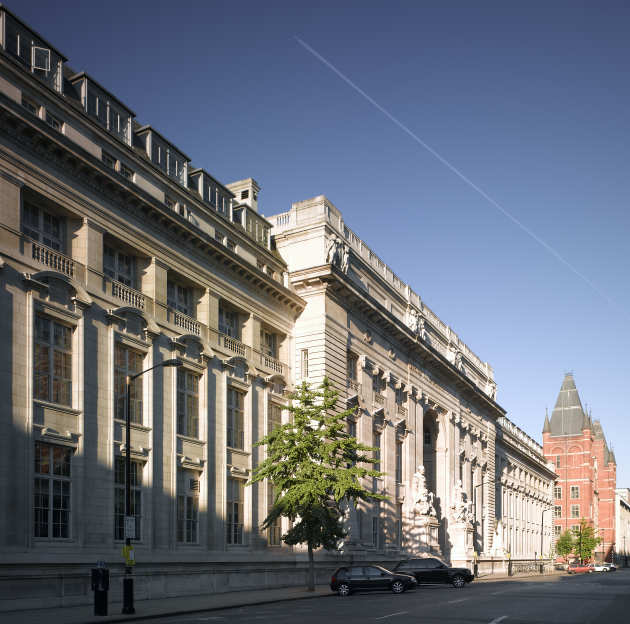

In [15]:
img_raw

In [21]:
(cifar10_train.data[0]).shape
#we expect the data in the form (channels, size, size)

(32, 32, 3)

In [31]:
frog = (cifar10_train.data[0]).reshape(3, 32, 32)
frog.shape

(3, 32, 32)

In [37]:
tensor_frog = torch.tensor(frog).float()
tensor_frog.type

<function Tensor.type>

In [38]:
output = m(tensor_frog)

RuntimeError: Expected 4-dimensional input for 4-dimensional weight [6, 3, 5, 5], but got 3-dimensional input of size [3, 32, 32] instead

In [40]:
#Devito
from devito import Function, Operator, Eq, Grid, dimensions
from devito import set_log_level
set_log_level('PERF')
SOBEL_VERTICAL = [[1, 0, -1],
                  [2, 0, -2],
                  [1, 0, -1]]


def get_function(name, matrix=None, shape=None, dimensions=None,
                 space_order=1):
    if matrix is None and shape is None:
        raise Exception("Either matrix or shape must be provided")

    if matrix is not None:
        shape = (len(matrix), len(matrix[0]))

    if dimensions is None:
        grid = Grid(shape=shape)
    else:
        grid = Grid(shape=shape, dimensions=dimensions)

    function = Function(name=name, grid=grid, space_order=space_order)

    if matrix is not None:
        function.data[:] = matrix

    return function


def error_check(kernel, image):
    if kernel is None or len(kernel) == 0:
        raise Exception("kernel must not be empty")

    if image is None or len(image) == 0:
        raise Exception("image must not be empty")

    different_row_length = False
    for row in kernel:
        if len(row) != len(kernel[0]):
            different_row_length = True
            break

    if different_row_length:
        raise Exception("kernel has an invalid shape")

    different_row_length = False
    for row in image:
        if len(row) != len(image[0]):
            different_row_length = True
            break

    if different_row_length:
        raise Exception("image has an invalid shape")

    if len(kernel) % 2 == 0 or len(kernel[0]) % 2 == 0:
        raise Exception("The dimensions of kernel must be odd")


def run(kernel, image):
    # It is assumed that both kernel and image have only two dimensions.

    error_check(kernel, image)

    A = get_function(name='A', matrix=kernel,
                     dimensions=dimensions('m n'), space_order=0)
    B = get_function(name='B', matrix=image, space_order=1)
    R = get_function(name='R', shape=B.shape, space_order=0)

    x, y = B.dimensions
    kernel_rows, kernel_cols = A.shape
    op = Operator(Eq(R[x,y],
                     sum([A[kernel_rows - i - 1,
                            kernel_cols - j - 1] *
                          B[x - kernel_rows // 2 + i,
                            y - kernel_cols // 2 + j]
                          for i in range(kernel_rows)
                          for j in range(kernel_cols)])))

    op.apply()
    return R.data





Operator `Kernel` generated in 0.21 s
  * lowering.IET: 0.13 s (62.7 %)
     * specializing.IET: 0.08 s (38.6 %)
  * lowering.Expressions: 0.05 s (24.1 %)
Flops reduction after symbolic optimization: [0 --> 0]
Operator `Kernel` fetched `/tmp/devito-jitcache-uid0/8f9d8725a145adace0c3cfb447643168108e4130.c` in 0.18 s from jit-cache
Operator `Kernel` run in 0.01 s
* section0 computed in 0.01 s
Performance[mode=advanced] arguments: {'nthreads_nonaffine': 2}
Operator `Kernel` generated in 0.24 s
  * lowering.IET: 0.16 s (67.4 %)
     * specializing.IET: 0.12 s (50.5 %)
        * make_parallel: 0.08 s (33.7 %)
  * lowering.Expressions: 0.05 s (21.1 %)
Flops reduction after symbolic optimization: [0 --> 0]
Operator `Kernel` fetched `/tmp/devito-jitcache-uid0/8f9d8725a145adace0c3cfb447643168108e4130.c` in 0.11 s from jit-cache
Operator `Kernel` run in 0.01 s
* section0 computed in 0.01 s
Performance[mode=advanced] arguments: {'nthreads_nonaffine': 2}


[[ 68.  64. -32. -44. -36.]
 [ 44.  60.  12. -18. -56.]
 [ 42.  24.  24.   8. -66.]
 [ 74.  14.  14.  -6. -88.]
 [ 50.  20.  20. -20. -70.]]
